##Setup Drive

In [44]:
import os
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [45]:
path = "/content/drive/My Drive/UFSC (12019-12023)/PIC/Cmos Data/Inversor/Análise de dados"
os.chdir(path)
print("Current path:", os.getcwd())
print("Files:")
for file in os.listdir():
  print(" ", file)

Current path: /content/drive/.shortcut-targets-by-id/1uwso5dEstA0SfrmQV1ZtCUf0eU1T-YLq/PIC/Cmos Data/Inversor/Análise de dados
Files:
  Análise de dados NOT.ipynb
  joined_data.csv
  treated_data.csv
  Cópia de Advanced_Algorithms.ipynb
  Análise de dados (old).ipynb


##Exploração de dados

###Leitura dos dados
Carrega os dados em um DataFrame pandas com as variáveis de entrada como índices.

In [46]:
import pandas as pd
import numpy as np
data = pd.read_csv('treated_data.csv', index_col=0)
data.describe()

,nmos@var,pmos@varp,tphl,tplh,iint,temper,voltage,length,width_pmos,width_nmos
count,576000.000000,576000.000000,5.760000e+05,5.760000e+05,5.760000e+05,576000.000000,576000.000000,5.760000e+05,5.760000e+05,5.760000e+05
mean,0.509033,-0.450689,1.411136e-11,3.199148e-11,-1.612343e-15,37.500000,0.750000,3.600000e-08,2.658333e-07,1.225000e-07
std,0.016785,0.015277,8.440719e-12,3.459376e-11,9.355345e-16,42.695665,0.111803,4.000003e-09,1.082789e-07,5.051819e-08
min,0.461300,-0.493300,4.542000e-12,4.125000e-12,-1.226000e-14,-25.000000,0.600000,3.200000e-08,7.000000e-08,7.000000e-08
25%,0.497775,-0.461900,8.612000e-12,1.208000e-11,-1.731000e-15,0.000000,0.675000,3.200000e-08,1.925000e-07,7.000000e-08
50%,0.508850,-0.450500,1.165000e-11,2.054000e-11,-1.318000e-15,37.500000,0.750000,3.600000e-08,2.800000e-07,1.400000e-07
75%,0.520125,-0.440300,1.641000e-11,3.888000e-11,-1.070000e-15,75.000000,0.825000,4.000000e-08,3.400000e-07,1.400000e-07
max,0.586100,-0.405800,1.396000e-10,4.273000e-10,-6.789000e-16,100.000000,0.900000,4.000000e-08,4.200000e-07,2.100000e-07


In [47]:
inp_var = ["temper", "voltage", "length", "width_pmos", "width_nmos"]
unique = {}
for col in inp_var:
  unique[col] = list(np.sort(data[col].unique()))
unique

{'length': [3.2e-08, 4e-08],
 'temper': [-25.0, 0.0, 25.0, 50.0, 75.0, 100.0],
 'voltage': [0.6, 0.7, 0.8, 0.9],
 'width_nmos': [7e-08, 1.4e-07, 2.1e-07],
 'width_pmos': [7e-08, 1.4e-07, 2.1e-07, 2.8e-07, 3.4e-07, 4.2e-07]}

In [48]:
tmp = data[inp_var]
# Verifica quantas vezes o mesmo caso é repetido
n_repetitions = tmp.shape[0]
for i in range(1, tmp.shape[0]):
  if (not tmp.iloc[0].equals(tmp.iloc[i])):
    n_repetitions = i
    break

n_cases = tmp.shape[0]//n_repetitions
idx = []
idx.append(np.vstack([np.arange(n_cases)]*n_repetitions).T.reshape(-1))
idx.append(np.concatenate([np.arange(n_repetitions)]*n_cases))
data.index = pd.MultiIndex.from_tuples(list(zip(*idx)), names=["case", "idx"])
data

nmos@var  pmos@varp          tphl          tplh          iint  \
case idx                                                                  
0    0      0.5166    -0.4341  1.873000e-11  1.832000e-11 -7.727000e-16   
     1      0.5064    -0.4523  1.789000e-11  1.983000e-11 -7.881000e-16   
     2      0.4909    -0.4618  1.673000e-11  2.086000e-11 -7.808000e-16   
     3      0.4882    -0.4667  1.655000e-11  2.135000e-11 -7.832000e-16   
     4      0.5275    -0.4342  1.970000e-11  1.834000e-11 -7.699000e-16   
...            ...        ...           ...           ...           ...   
575  995    0.5126    -0.4225  1.565000e-11  5.534000e-11 -1.071000e-15   
     996    0.4847    -0.4406  1.456000e-11  5.844000e-11 -1.089000e-15   
     997    0.4997    -0.4561  1.512000e-11  6.145000e-11 -1.076000e-15   
     998    0.5154    -0.4417  1.576000e-11  5.870000e-11 -1.076000e-15   
     999    0.4994    -0.4547  1.511000e-11  6.116000e-11 -1.076000e-15   

          temper  voltage        length    width_pmos    width_nmos  
case idx                                                             
0    0     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     1     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     2     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     3     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     4     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
...          ...      ...           ...           ...           ...  
575  995    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     996    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     997    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     998    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     999    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  

[576000 rows x 10 columns]

In [49]:
data[data.columns[0]]
def gauss(nom, rvar, sig, data):
  return (nom + (nom*rvar)/sig * data)
gauss(0.5088, 0.1, 3, data[data.columns[0]]).describe()

count    576000.000000
mean          0.517433
std           0.000285
min           0.516624
25%           0.517242
50%           0.517430
75%           0.517621
max           0.518740
Name: nmos@var, dtype: float64

In [50]:
data[data.columns[1]]
def gauss(nom, rvar, sig, data):
  return (nom + (nom*rvar)/sig * data)
gauss(-0.450, 0.1, 3, data[data.columns[1]]).describe()

count    576000.000000
mean         -0.443240
std           0.000229
min          -0.443913
25%          -0.443395
50%          -0.443242
75%          -0.443072
max          -0.442601
Name: pmos@varp, dtype: float64

###Remoção de Outliers


In [51]:
from scipy.stats import zscore
out_var = ["tphl", "tplh", "iint"]
filtered_list = []
for case in data.index.unique(level="case"):
    tmp = data.loc[slice(case, case), :]
    not_outlier = (np.abs(zscore(tmp[out_var])) < 3).all(axis=1)
    filtered_list.append(tmp[not_outlier])
filtered = pd.concat(filtered_list)
filtered

nmos@var  pmos@varp          tphl          tplh          iint  \
case idx                                                                  
0    0      0.5166    -0.4341  1.873000e-11  1.832000e-11 -7.727000e-16   
     1      0.5064    -0.4523  1.789000e-11  1.983000e-11 -7.881000e-16   
     2      0.4909    -0.4618  1.673000e-11  2.086000e-11 -7.808000e-16   
     3      0.4882    -0.4667  1.655000e-11  2.135000e-11 -7.832000e-16   
     4      0.5275    -0.4342  1.970000e-11  1.834000e-11 -7.699000e-16   
...            ...        ...           ...           ...           ...   
575  995    0.5126    -0.4225  1.565000e-11  5.534000e-11 -1.071000e-15   
     996    0.4847    -0.4406  1.456000e-11  5.844000e-11 -1.089000e-15   
     997    0.4997    -0.4561  1.512000e-11  6.145000e-11 -1.076000e-15   
     998    0.5154    -0.4417  1.576000e-11  5.870000e-11 -1.076000e-15   
     999    0.4994    -0.4547  1.511000e-11  6.116000e-11 -1.076000e-15   

          temper  voltage        length    width_pmos    width_nmos  
case idx                                                             
0    0     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     1     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     2     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     3     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
     4     -25.0      0.6  3.200000e-08  1.400000e-07  7.000000e-08  
...          ...      ...           ...           ...           ...  
575  995    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     996    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     997    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     998    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  
     999    50.0      0.9  4.000000e-08  7.000000e-08  7.000000e-08  

[567411 rows x 10 columns]

###Histograma de cada caso (Simulação de Monte Carlo)

&ensp; Gráficos da distribuição de frequência de cada variável de saída em cada caso conjunto de amostras onde as variáveis de entrada tem o mesmo valor)

&ensp; Está sendo utilizado o teste de Shapiro para plotar apenas os 10% casos menos parecidos com a distribuição normal.

In [87]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import shapiro

def plot_hist(dt, col, inp, figunit=(2, 2), print_worst=0.1):
  index = dt.index.levels[0]
  shapiro_results = []
  gaussian = 0
  for idx in index:
    test = shapiro(dt[col].loc[idx])[1]
    shapiro_results.append((idx, test))
    gaussian += test > 0.05
  print("%i of %i gaussian samples" %(gaussian, len(index)))
  shapiro_results.sort(key=(lambda x: x[1]))

  qnt = int(index.shape[0]*print_worst)
  n_col = int(np.ceil(np.sqrt(qnt)/1.7))
  n_rows = int(np.ceil(qnt/n_col))
  fig, axs = plt.subplots(n_rows, n_col, sharey=True,
                          figsize=(figunit[0]*n_col, figunit[1]*n_rows))
  
  fig.suptitle('Todos os casos (%s)' %(col), fontsize=16)

  fig.tight_layout()
  fig.subplots_adjust(wspace=0)#, top=0.95)

  for i in range(n_rows):
    for j in range(i*n_col, min(qnt, (i+1)*n_col)):
      idx = shapiro_results[j][0]
      dt[col].loc[idx].hist(bins=20, ax=axs[i][j-i*n_col], alpha=0.6)

  for i in range(n_rows):
    ylim = axs[i][0].get_ylim()
    ybottom = ylim[0]+np.mean(ylim)*0.01
    ytop    = ylim[1]-np.mean(ylim)*0.01

    for j in range(i*n_col, min(qnt, (i+1)*n_col)):
      ax = axs[i][j-i*n_col]
      xlim = ax.get_xlim()
      xbottom = xlim[0]+np.mean(xlim)*0.01
      xtop    = xlim[1]-np.mean(xlim)*0.01

      idx = shapiro_results[j][0]
      txt = "shapiro = %.2e\n" %shapiro_results[j][1]
      txt += "\n".join(["%s = %.2e" %(var, dt[var].loc[idx].iloc[0]) for var in inp])

      ax.text(xbottom, ytop, txt, size="small", alpha=0.8, va="top")
      ax.text(xtop, ybottom, "%i" %(idx), ha="right")

####TPHL

15 of 576 gaussian samples


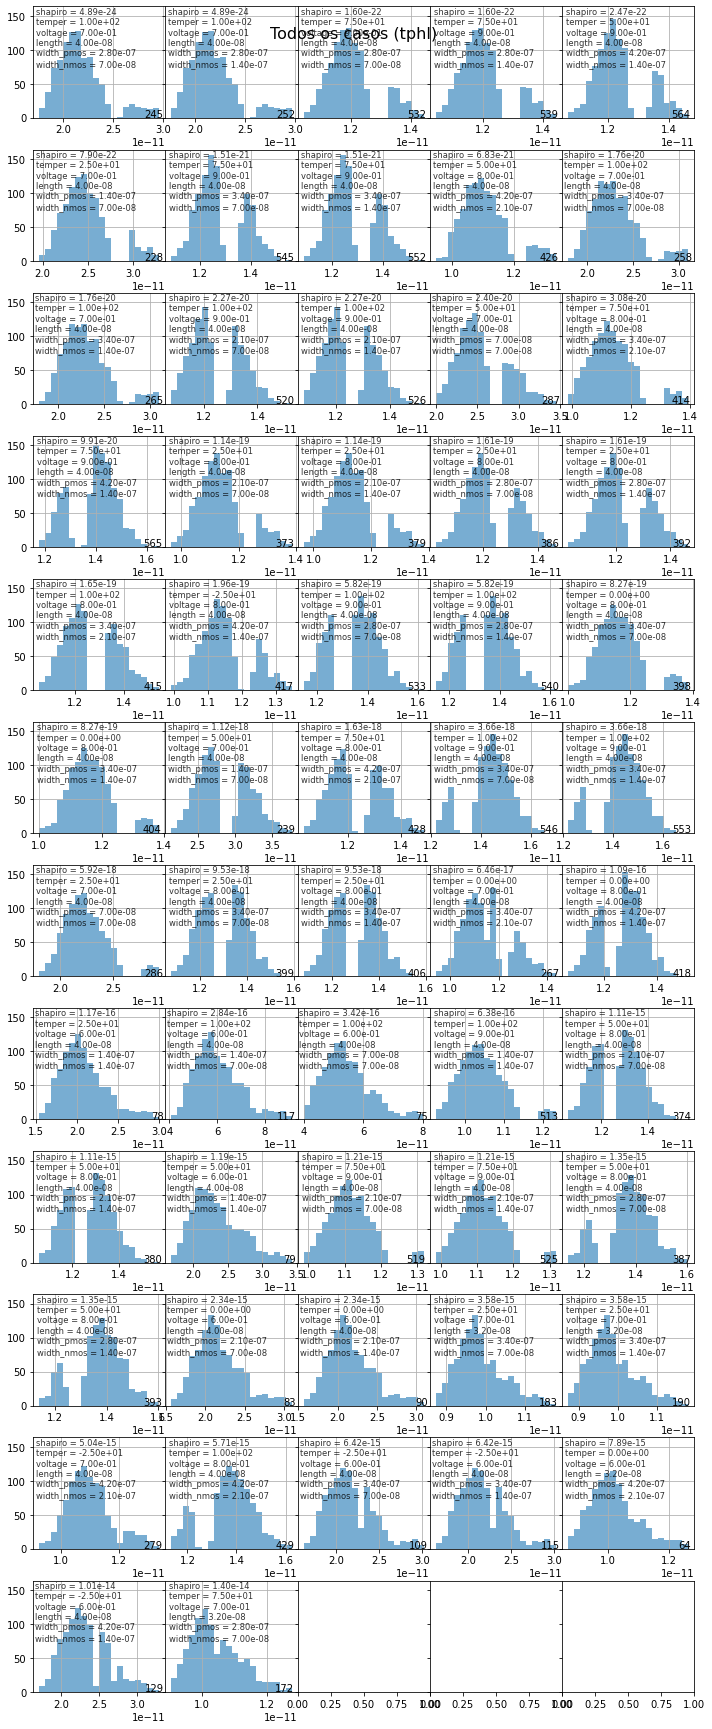

In [88]:
plot_hist(filtered, "tphl", inp_var, print_worst=0.1)

####TPLH

117 of 576 gaussian samples


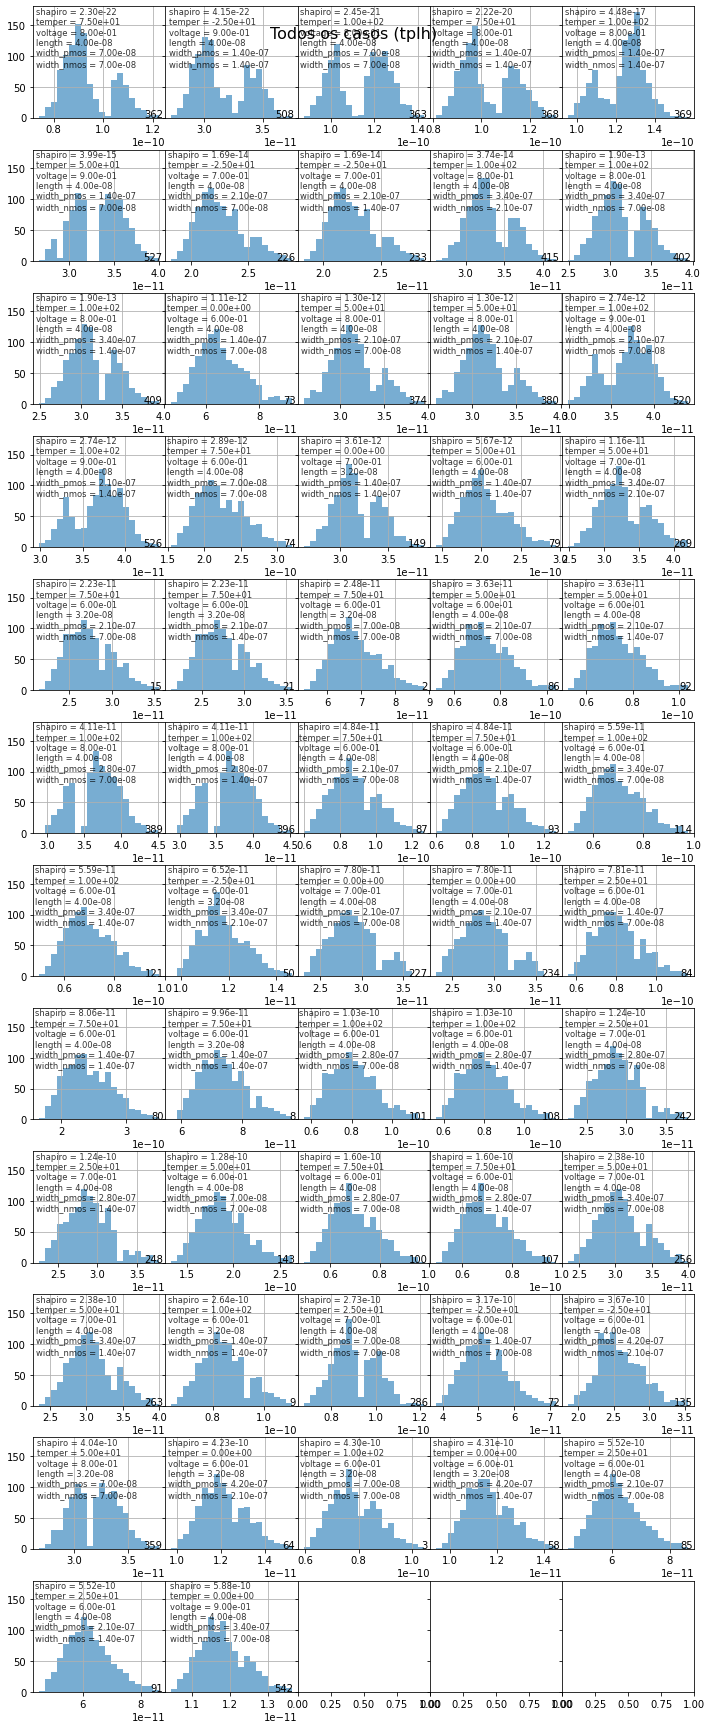

In [74]:
plot_hist(filtered, "tplh", inp_var, print_worst=0.1)

####IINT

5 of 576 gaussian samples


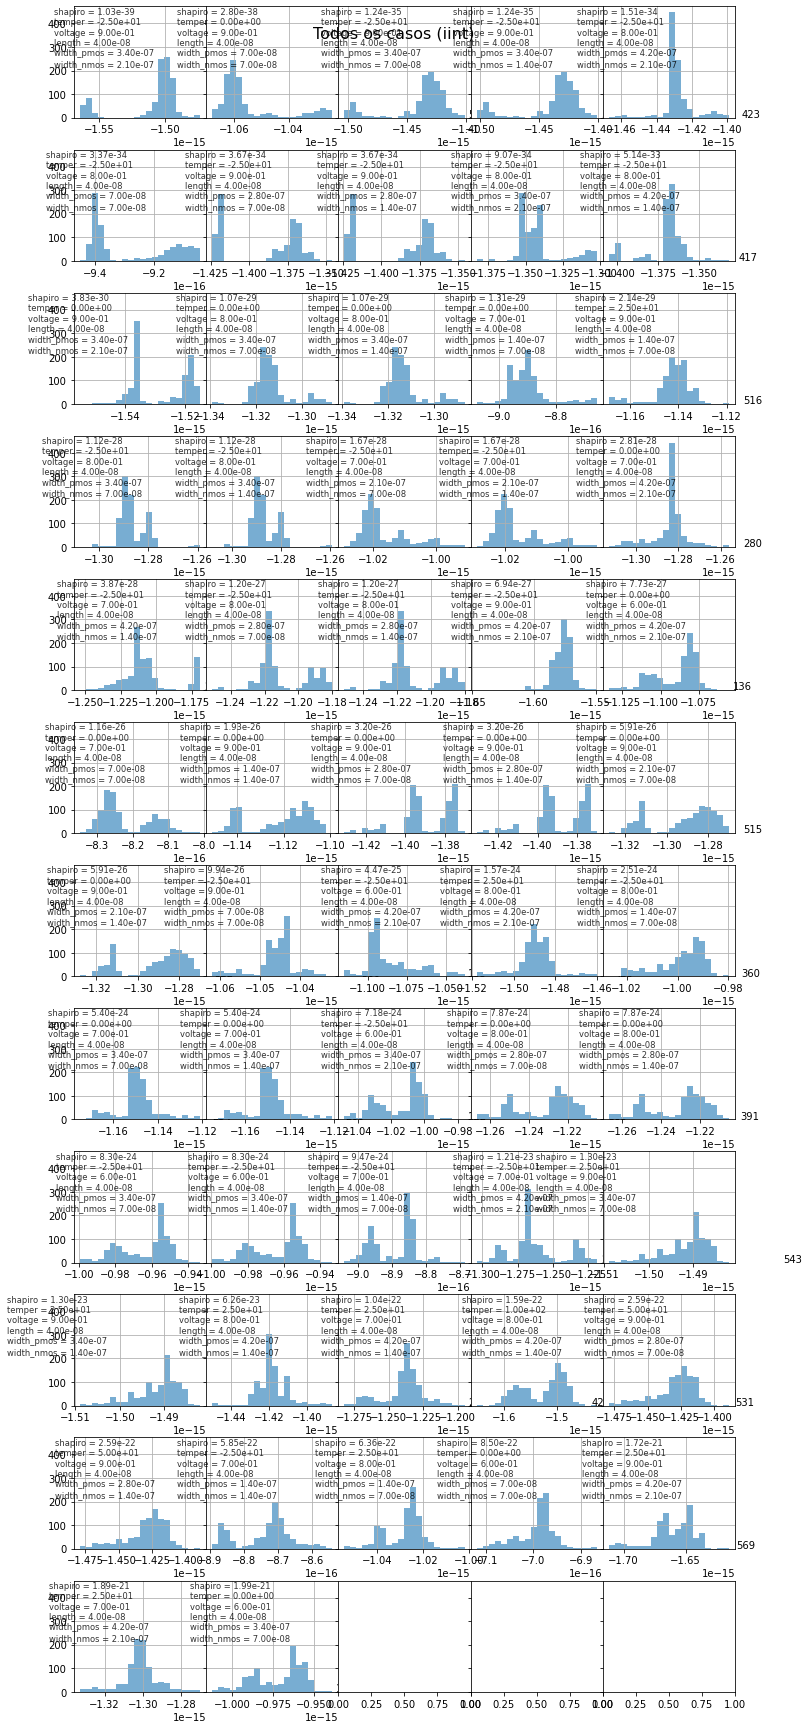

In [77]:
plot_hist(filtered, "iint", inp_var, print_worst=0.1)

###Estudo de um dos casos com distribuição bimodal

Alguns casos apresentaram uma distribuição bimodal na distribuição de frequência das saídas.

In [79]:
caso = (565, "tphl")
filtered.loc[caso[0]].describe()

,nmos@var,pmos@varp,tphl,tplh,iint,temper,voltage,length,width_pmos,width_nmos
count,990.000000,990.000000,9.900000e+02,9.900000e+02,9.900000e+02,990.0,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02
mean,0.509259,-0.450619,1.395173e-11,1.883711e-11,-1.668957e-15,75.0,9.000000e-01,4.000000e-08,4.200000e-07,1.400000e-07
std,0.016218,0.015218,9.248711e-13,9.501080e-13,1.813435e-17,0.0,1.510666e-14,3.442811e-22,5.826295e-22,7.150453e-22
min,0.466400,-0.493300,1.179000e-11,1.624000e-11,-1.726000e-15,75.0,9.000000e-01,4.000000e-08,4.200000e-07,1.400000e-07
25%,0.498225,-0.461875,1.294000e-11,1.816250e-11,-1.682000e-15,75.0,9.000000e-01,4.000000e-08,4.200000e-07,1.400000e-07
50%,0.509000,-0.450500,1.414000e-11,1.881000e-11,-1.668000e-15,75.0,9.000000e-01,4.000000e-08,4.200000e-07,1.400000e-07
75%,0.520175,-0.440300,1.458000e-11,1.948000e-11,-1.656000e-15,75.0,9.000000e-01,4.000000e-08,4.200000e-07,1.400000e-07
max,0.564000,-0.405800,1.650000e-11,2.162000e-11,-1.613000e-15,75.0,9.000000e-01,4.000000e-08,4.200000e-07,1.400000e-07


Segundo os dados, todas as amostras desse caso foram feitas utilizando os mesmos valores de entrada (temper, voltage, length, width_pmos, width_nmos), ou seja, aparetemente não houve erro na classificação de casos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


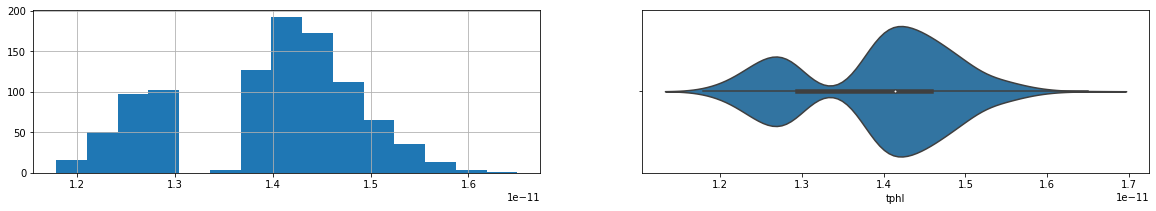

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(20, 3))
filtered.loc[caso[0]][caso[1]].hist(ax=axs[0], bins=15)
sns.violinplot(filtered.loc[caso[0]][caso[1]], ax=axs[1])
plt.show()

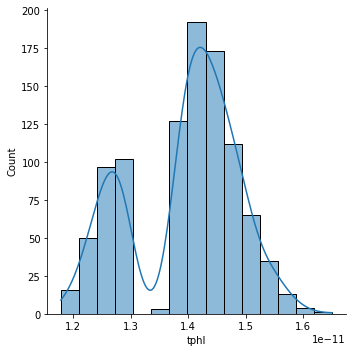

In [81]:
import seaborn as sns
sns.displot(filtered.loc[caso[0]][caso[1]], kde=True)

O histograma com mais *bins* revela que a distribuição de frequência parece muito com uma distribuição normal, mas com uma "região" faltando.

Para ver se isso tem alguma relação com as variações feitas durante a simulação de Monte Carlo, foi plotado o gráfico "3D" das projeções dos dados em cada plano.

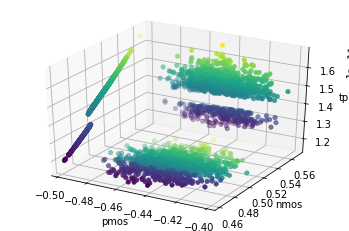

In [82]:
ax = plt.figure().add_subplot(projection='3d')
def lim(x):
  min = np.min(x)
  max = np.max(x)
  interv = (max-min)*0.1
  return (min-interv, max+interv)

# Data for three-dimensional scattered points
Z = filtered.loc[caso[0]][caso[1]]
zlim = lim(Z)
X = filtered.loc[caso[0]]["pmos@varp"]
xlim = lim(X)
Y = filtered.loc[caso[0]]["nmos@var"]
ylim = lim(Y)
#ax.scatter3D(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5, alpha=0.2)
ax.scatter(X, Y, zdir='z', linewidth=0.5, zs=zlim[0], c=Z, cmap='viridis')
ax.scatter(X, Z, zdir='y', linewidth=0.5, zs=ylim[1], c=Z, cmap='viridis')
ax.scatter(Y, Z, zdir='x', linewidth=0.5, zs=xlim[0], c=Z, cmap='viridis')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)

ax.set_xlabel("pmos")
ax.set_ylabel("nmos")
ax.set_zlabel(caso[1]);

Pelas projeções dos dados podemos ver que o tempo de descida depende exclusivamente da variação do nmos, como esperado. A relação entre a variação do nmos e o delay parece ser linear, com exeção da "quebra" próxima do valor 0,52.

In [70]:
tmp = data.loc[caso[0]].sort_values(caso[1])
idxmax = tmp.diff()[caso[1]].iloc[:-10].argmax()
idxmax
tmp.iloc[idxmax-3:idxmax+3]

,nmos@var,pmos@varp,tphl,tplh,iint,temper,voltage,length,width_pmos,width_nmos
idx,,,,,,,,,,
897,0.4997,-0.4311,1.300000e-11,1.760000e-11,-1.689000e-15,75.0,0.9,4.000000e-08,4.200000e-07,1.400000e-07
402,0.4996,-0.4375,1.300000e-11,1.796000e-11,-1.687000e-15,75.0,0.9,4.000000e-08,4.200000e-07,1.400000e-07
144,0.4998,-0.4359,1.301000e-11,1.787000e-11,-1.687000e-15,75.0,0.9,4.000000e-08,4.200000e-07,1.400000e-07
456,0.4972,-0.4842,1.365000e-11,2.093000e-11,-1.653000e-15,75.0,0.9,4.000000e-08,4.200000e-07,1.400000e-07
249,0.4972,-0.4834,1.365000e-11,2.088000e-11,-1.652000e-15,75.0,0.9,4.000000e-08,4.200000e-07,1.400000e-07
341,0.4975,-0.4722,1.367000e-11,2.011000e-11,-1.680000e-15,75.0,0.9,4.000000e-08,4.200000e-07,1.400000e-07


##Ainda não feito


###Entradas x Saídas

####Temperatura (temper)

In [ ]:
from statsmodels.graphics.boxplots import violinplot
from matplotlib import pyplot as plt

def plot_inp_out(dt, inp, out=["tphl", "tplh", "iint"]):
  fig, axs = plt.subplots(len(out), 1, figsize=(23, 20))
  for i in range(len(out)):
    pos = dt[inp].unique()
    pos.sort()
    dist = pos[1]-pos[0]

    grouped = data.groupby(inp)[out[i]]
    d = [gr1 for (_,gr1) in grouped]
    violinplot(data=d, ax=axs[i], positions=pos, show_boxplot=False,
               plot_opts={"violin_width":dist*0.8, "cutoff":False})
    axs[i].plot(grouped.mean(), "-")
    axs[i].set_xlim([pos[0]-dist/2, pos[-1]+dist/2])
    axs[i].set_title("%s x %s" %(inp, out[i]))
    axs[i].grid(True)

#temper 	voltage 	length 	width_pmos 	width_nmos
plot_inp_out(data, "temper")

####Tensão (tensao)

In [ ]:
plot_inp_out(data, "voltage")

####Comprimento (length)

In [ ]:
plot_inp_out(data, "length")

####Largura PMOS (width_pmos)

In [ ]:
#temper 	voltage 	length 	width_pmos 	width_nmos
plot_inp_out(data, "width_pmos")

#### Largura NMOS (width_nmos)

In [ ]:
plot_inp_out(data, "width_nmos")

###Pearson e Spearman

###Violin Plot de cada caso (Simulação de Monte Carlo)

&ensp; Gráficos da distribuição de frequência de cada variável de saída em cada caso conjunto de amostras onde as variáveis de entrada tem o mesmo valor)

####TPHLA

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_hist(dt, col):
  n_rows = int(np.sqrt(n_cases))*2
  n_col = int(np.ceil(n_cases/n_rows))
  fig, axs = plt.subplots(n_rows, 1, figsize=(23, 200))
  for i in range(n_rows):
    index = range(i*n_col, min(n_cases, (i+1)*n_col))
    grouped = [dt[col].loc[i].values for i in index]
    sns.violinplot(data=grouped, ax=axs[i])
    axs[i].set_xticklabels(labels=index)
    axs[i].set_xlim([-0.5, n_col-0.5])

plot_hist(data, "tphla")

####TPHLB

####TPLH

In [ ]:
plot_hist(data, "tplh")

####IINT

In [ ]:
plot_hist(data, "iint")

In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 8))
pear = data[data.columns[2:]].corr().iloc[:3]
spear = data[data.columns[2:]].corr(method='spearman').iloc[:3]

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

sns.heatmap(pear, center=0, annot=True, fmt='.2f', square=True, 
            cmap=cmap, cbar=False, ax=axs[0])
sns.heatmap(spear, center=0, annot=True, fmt='.2f', square=True, 
            cmap=cmap, cbar=False, ax=axs[1])
axs[0].set_title("Pearson (linear)")
axs[1].set_title("Spearman (monotonic)")
plt.show();